<a href="https://colab.research.google.com/github/g-roger/deep-learning/blob/master/Exerc%C3%ADcio_MLP_Simplificado_2_Spotify_Em_branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense
#necessita do pydot pip install pydot
import pydot

###Carga do Dataset

In [ ]:
url = 'https://telescopeinstorage.blob.core.windows.net/datasets/DadosSpotify.csv'
dataset = pd.read_csv(url, engine='python')
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
dataset.shape

(2017, 17)

###Pré-processamento

In [ ]:
#Coloque Aqui as fases de pré-processamento
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
#Normalização do Conjunto
X=dataset.drop(['target','song_title','artist'],axis=1)
y=dataset['target']

X=StandardScaler().fit_transform(X)

In [ ]:
#Separação do Conjunto de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

###Classificação

In [ ]:
#Modelo da Rede MLP
qtd_neuronios=len(dataset.drop(['target','song_title','artist'],axis=1).columns)
qtd_neuronios

model = Sequential()
model.add(Dense(16, input_dim=qtd_neuronios, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Processo de treinamento com 70% dos dados
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
142/142 [==============================] - 1s 1ms/step - loss: 0.6663 - accuracy: 0.6024
Epoch 2/100
142/142 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8441
Epoch 3/100
142/142 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.9426
Epoch 4/100
142/142 [==============================] - 0s 1ms/step - loss: 0.2195 - accuracy: 0.9589
Epoch 5/100
142/142 [==============================] - 0s 1ms/step - loss: 0.1682 - accuracy: 0.9738
Epoch 6/100
142/142 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9802
Epoch 7/100
142/142 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9844
Epoch 8/100
142/142 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 0.9858
Epoch 9/100
142/142 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9887
Epoch 10/100
142/142 [==============================] - 0s 1ms/step - loss: 0.0690 - accura

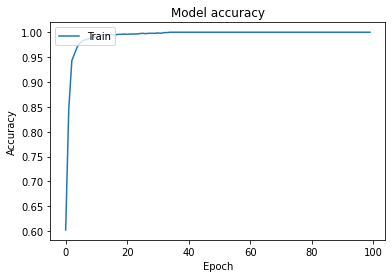

In [ ]:
#Processo de teste com 30% dos dados que não foram utilizados no treinamento
history  = model.fit(X_train, y_train, epochs=100, batch_size=10)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
#Avaliação do Modelo
y_pred_out  = model.predict(X_test)
print(y_pred_out)


[[1.00000000e+00]
 [9.63987112e-01]
 [1.00000000e+00]
 [1.12141980e-11]
 [4.38549110e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.31671426e-13]
 [1.43657450e-25]
 [9.11463938e-13]
 [9.99999821e-01]
 [3.66900182e-14]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99945045e-01]
 [1.00000000e+00]
 [3.58689719e-28]
 [1.00000000e+00]
 [9.99972343e-01]
 [1.00000000e+00]
 [7.69787978e-19]
 [1.00000000e+00]
 [6.23596634e-06]
 [1.98030372e-23]
 [2.20885866e-24]
 [4.18331510e-05]
 [1.00000000e+00]
 [1.96808099e-08]
 [1.46452084e-09]
 [9.99999762e-01]
 [1.28451368e-25]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.76361694e-25]
 [2.17597704e-29]
 [8.59053273e-09]
 [2.08650981e-15]
 [9.99980271e-01]
 [1.00000000e+00]
 [9.98902678e-01]
 [1.00000000e+00]
 [1.23185818e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.45652292e-11]
 [8.88083986e-13]
 [9.99932528e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.90985990e-08]
 [2.22902226e-23]
 [4.436407

In [ ]:
y_pred_classes = (y_pred_out > 0.5).astype(int) 
y_pred_classes


array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
accuracy_score(y_true=y_test,y_pred=y_pred_classes)

0.9983498349834984